### Import Libarary

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm  

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import  LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score,KFold,GridSearchCV, RandomizedSearchCV, Bay
from sklearn.metrics import mean_squared_error,r2_score, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

### Read Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
bike = pd.read_csv('/content/gdrive/MyDrive/Biker Sharing /# Final Project/Dataset/bike.csv')

In [ ]:
bike.head()

,season,year,month,day,hr,is_holiday,is_workingday,weather_condition,temp,humidity,windspeed,count,date
0,Spring,2011,January,1,0,No,No,Clear,9.84,81.0,0.0,16,1
1,Spring,2011,January,1,1,No,No,Clear,9.02,80.0,0.0,40,1
2,Spring,2011,January,1,2,No,No,Clear,9.02,80.0,0.0,32,1
3,Spring,2011,January,1,3,No,No,Clear,9.84,75.0,0.0,13,1
4,Spring,2011,January,1,4,No,No,Clear,9.84,75.0,0.0,1,1


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             17379 non-null  object 
 1   year               17379 non-null  int64  
 2   month              17379 non-null  object 
 3   day                17379 non-null  int64  
 4   hr                 17379 non-null  int64  
 5   is_holiday         17379 non-null  object 
 6   is_workingday      17379 non-null  object 
 7   weather_condition  17379 non-null  object 
 8   temp               17379 non-null  float64
 9   humidity           17379 non-null  float64
 10  windspeed          17379 non-null  float64
 11  count              17379 non-null  int64  
 12  date               17379 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.7+ MB


In [ ]:
bike.describe()

,year,day,hr,temp,humidity,windspeed,count,date
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,15.683411,11.546752,20.376474,62.722884,12.736540,189.463088,15.683411
std,0.500008,8.789373,6.914405,7.894801,19.292983,8.196795,181.387599,8.789373
min,2011.000000,1.000000,0.000000,0.820000,0.000000,0.000000,1.000000,1.000000
25%,2011.000000,8.000000,6.000000,13.940000,48.000000,7.001500,40.000000,8.000000
50%,2012.000000,16.000000,12.000000,20.500000,63.000000,12.998000,142.000000,16.000000
75%,2012.000000,23.000000,18.000000,27.060000,78.000000,16.997900,281.000000,23.000000
max,2012.000000,31.000000,23.000000,41.000000,100.000000,56.996900,977.000000,31.000000


In [ ]:
bike

,season,year,month,day,hr,is_holiday,is_workingday,weather_condition,temp,humidity,windspeed,count,date
0,Spring,2011,January,1,0,No,No,Clear,9.84,81.0,0.0000,16,1
1,Spring,2011,January,1,1,No,No,Clear,9.02,80.0,0.0000,40,1
2,Spring,2011,January,1,2,No,No,Clear,9.02,80.0,0.0000,32,1
3,Spring,2011,January,1,3,No,No,Clear,9.84,75.0,0.0000,13,1
4,Spring,2011,January,1,4,No,No,Clear,9.84,75.0,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,Spring,2012,December,31,19,No,Yes,Cloudy,10.66,60.0,11.0014,119,31
17375,Spring,2012,December,31,20,No,Yes,Cloudy,10.66,60.0,11.0014,89,31
17376,Spring,2012,December,31,21,No,Yes,Clear,10.66,60.0,11.0014,90,31
17377,Spring,2012,December,31,22,No,Yes,Clear,10.66,56.0,8.9981,61,31


### Encoding Categorical

In [ ]:
bike.columns

Index(['season', 'year', 'month', 'day', 'hr', 'is_holiday', 'is_workingday',
       'weather_condition', 'temp', 'humidity', 'windspeed', 'count', 'date'],
      dtype='object')

Ordinal Encoder
Dari data categorikal yang cocok menggunakan ordinal encoder yaitu : 

* year
* month
* day
* hr

Data categorikal diatas menunjukan tingkatan yang berurutan



In [ ]:
bike['year'] = bike['year'].map({2011:0 , 2012 :1})
bike['month'] = bike['month'].map({'January' :1 ,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})

In [ ]:
bike_ordinal = bike[['year','month','day','hr']]
bike_ordinal 

,year,month,day,hr
0,0,1,1,0
1,0,1,1,1
2,0,1,1,2
3,0,1,1,3
4,0,1,1,4
...,...,...,...,...
17374,1,12,31,19
17375,1,12,31,20
17376,1,12,31,21
17377,1,12,31,22


In [ ]:
bike_ordinal.reset_index(drop=True,inplace=True)

One Hot 
Dari data categorikal yang cocok menggunakan one Hot Encoder yaitu : 

* season
* is_holiday
* is_working
* weather_condition


Data categorikal diatas kategorinya sangat acak



In [ ]:
ohe = OneHotEncoder()
bike_ohe = bike[['season','is_holiday', 'is_workingday',
       'weather_condition']]
bike_ohe = ohe.fit_transform(bike_ohe).toarray().astype('int64')
bike_ohe = pd.DataFrame(bike_ohe,columns=(pd.get_dummies(bike[['season','is_holiday', 'is_workingday',
       'weather_condition']]).columns))
bike_ohe

,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
0,0,1,0,0,1,0,1,0,1,0,0,0
1,0,1,0,0,1,0,1,0,1,0,0,0
2,0,1,0,0,1,0,1,0,1,0,0,0
3,0,1,0,0,1,0,1,0,1,0,0,0
4,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,1,0,0,1,0,0,1,0,1,0,0
17375,0,1,0,0,1,0,0,1,0,1,0,0
17376,0,1,0,0,1,0,0,1,1,0,0,0
17377,0,1,0,0,1,0,0,1,1,0,0,0


In [ ]:
bike_ohe.reset_index(drop=True,inplace=True)

### Numerical Values

In [ ]:
bike_num = bike[['temp','humidity','windspeed','count']]
bike_num

,temp,humidity,windspeed,count
0,9.84,81.0,0.0000,16
1,9.02,80.0,0.0000,40
2,9.02,80.0,0.0000,32
3,9.84,75.0,0.0000,13
4,9.84,75.0,0.0000,1
...,...,...,...,...
17374,10.66,60.0,11.0014,119
17375,10.66,60.0,11.0014,89
17376,10.66,60.0,11.0014,90
17377,10.66,56.0,8.9981,61


### Dataset

In [ ]:
dataset = pd.concat([bike_num,bike_ordinal,bike_ohe],axis=1)

In [ ]:
dataset

,temp,humidity,windspeed,count,year,month,day,hr,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_No,is_holiday_Yes,is_workingday_No,is_workingday_Yes,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Heavy Rain,weather_condition_Light Rain
0,9.84,81.0,0.0000,16,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0
1,9.02,80.0,0.0000,40,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0
2,9.02,80.0,0.0000,32,0,1,1,2,0,1,0,0,1,0,1,0,1,0,0,0
3,9.84,75.0,0.0000,13,0,1,1,3,0,1,0,0,1,0,1,0,1,0,0,0
4,9.84,75.0,0.0000,1,0,1,1,4,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,10.66,60.0,11.0014,119,1,12,31,19,0,1,0,0,1,0,0,1,0,1,0,0
17375,10.66,60.0,11.0014,89,1,12,31,20,0,1,0,0,1,0,0,1,0,1,0,0
17376,10.66,60.0,11.0014,90,1,12,31,21,0,1,0,0,1,0,0,1,1,0,0,0
17377,10.66,56.0,8.9981,61,1,12,31,22,0,1,0,0,1,0,0,1,1,0,0,0


In [ ]:
dataset.to_csv(r'/content/gdrive/MyDrive/Biker Sharing /# Final Project/Dataset/dataset.csv', index = False, header=True)

### Data splitting

In [ ]:
X = dataset.drop(columns=['count'])
y = dataset['count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
print('X Train Shape',X_train.shape,)
print('y Train Shape',y_train.shape,)

X Train Shape (12165, 19)
y Train Shape (12165,)


In [ ]:
print('X Test Shape',X_test.shape,)
print('y Test Shape',y_test.shape,)

X Test Shape (5214, 19)
y Test Shape (5214,)


### Machine learning regressor



#Data tranning di ulik lagi
random forrest : split training, random
pycaret

In [ ]:
models=[LinearRegression(),XGBRegressor(),RandomForestRegressor(random_state=123)]
model_names=['Linear Regresion','XGBRegressor','RandomForestRegressor']
rmse = []
r2 = []
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_train)
    rmse.append(np.sqrt(mean_squared_error(y_train,y_pred)))
    r2.append(r2_score(y_train,y_pred))
d={'Modelling Algo':model_names,'RMSE':rmse, 'R2 Score':r2}   
d

[07:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'Modelling Algo': ['Linear Regresion',
  'XGBRegressor',
  'RandomForestRegressor'],
 'R2 Score': [0.39761777593555336, 0.8432492978491094, 0.9910904723962065],
 'RMSE': [141.94958924911043, 72.41071132949868, 17.263363103379614]}

In [ ]:
model = pd.DataFrame(d)
model

,Modelling Algo,RMSE,R2 Score
0,Linear Regresion,141.949589,0.397618
1,XGBRegressor,72.410711,0.843249
2,RandomForestRegressor,17.263363,0.991090


In [ ]:
model = pd.DataFrame(d)
model

,Modelling Algo,RMSE,R2 Score
0,Linear Regresion,137.905210,0.397995
1,XGBRegressor,70.103336,0.844433
2,RandomForestRegressor,44.358200,0.937715


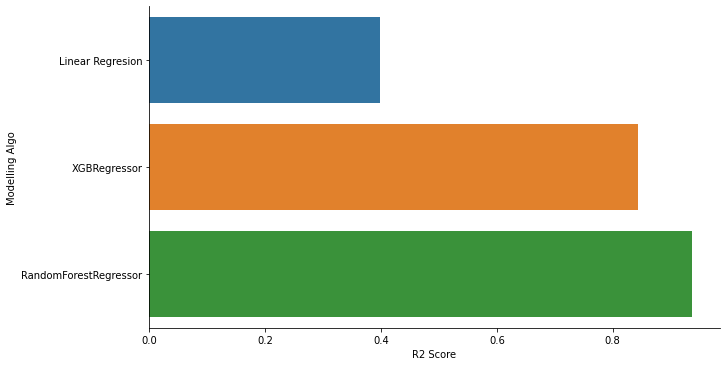

In [ ]:
sns.factorplot(y='Modelling Algo',x='R2 Score',data=model,kind='bar',size=5,aspect=2)
plt.show() 

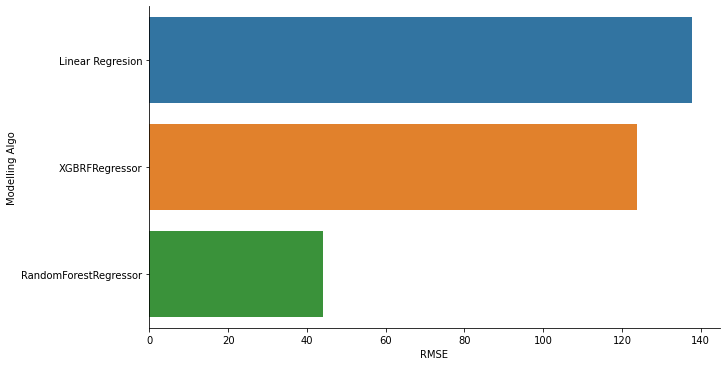

In [ ]:
sns.factorplot(y='Modelling Algo',x='RMSE',data=model,kind='bar',size=5,aspect=2)
plt.show()

### Cross validation

membuat data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split 

X_train_val, X_test_val, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=42) #Cross validation


In [ ]:
Scroing data traning 

In [ ]:
cv_models=[LinearRegression(),XGBRegressor(),RandomForestRegressor()]
cv_model_names=['Linear Regresion','XGBRFRegressor','RandomForestRegressor']
folds = KFold(n_splits = 5)
cv_score = []

d={}
for model in range (len(cv_models)):
    clf=cv_models[model]
    cv_score.append(cross_val_score(clf,X_train,y_train,cv=folds).mean())

f={'Modelling Algo':model_names,'CV Score':cv_score}   
f

[07:11:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:11:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'CV Score': [0.3954595218529734, 0.8407382203242009, 0.9327682554467035],
 'Modelling Algo': ['Linear Regresion',
  'XGBRegressor',
  'RandomForestRegressor']}

In [ ]:
modelcv = pd.DataFrame(f)
modelcv

,Modelling Algo,CV Score
0,Linear Regresion,0.395460
1,XGBRegressor,0.840738
2,RandomForestRegressor,0.932768


#Hyperparam masukin cv


In [ ]:
cv_models=[LinearRegression(),XGBRFRegressor(),RandomForestRegressor()]
cv_model_names=['Linear Regresion','XGBRFRegressor','RandomForestRegressor']
folds = KFold(n_splits = 5)
cv_score = []

d={}
for model in range (len(cv_models)):
    clf=cv_models[model]
    cv_score.append(cross_val_score(clf,X_train,y_train,cv=folds,scoring='r2').mean())

e={'Modelling Algo':model_names,'R2 Score':cv_score}   
e

[06:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'Modelling Algo': ['Linear Regresion',
  'XGBRFRegressor',
  'RandomForestRegressor'],
 'R2 Score': [0.3954595218529734, 0.5188021918977215, 0.9325302352688849]}

In [ ]:
modelcv = pd.DataFrame(e)
modelcv

,Modelling Algo,R2 Score
0,Linear Regresion,0.395460
1,XGBRFRegressor,0.518802
2,RandomForestRegressor,0.932530


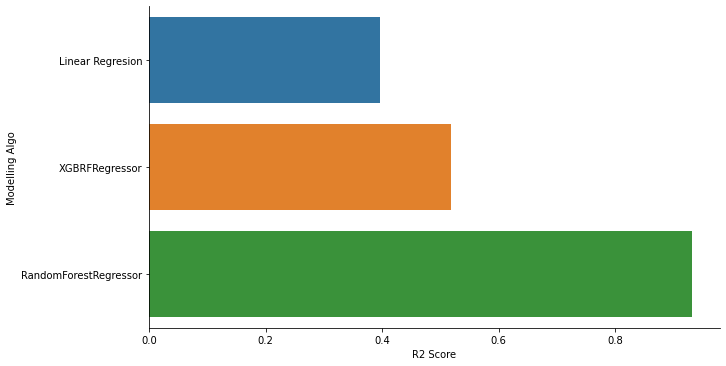

In [ ]:
sns.factorplot(y='Modelling Algo',x='R2 Score',data=modelcv,kind='bar',size=5,aspect=2)
plt.show() 

### Hyperparameter Tunning

* bysian / grid search / random search
* = 2^columns
* n_estimator 

In [ ]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

* cols_bytree
* max_dept
* estimator
* learning_rate

In [ ]:
XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)